В файле <i>orders</i> представлена информация о заказах в онлайн-магазине.
```
OrderID - ID Заказа,
UserID - ID клиента,
OrderTime - время заказа,
items - список элементов в заказе, каждый элемент описан словарем:
    ItemID  - ID продукта, 
    price - цена единицы товара, 
    quantity - количество единиц товара в заказе
```
В файле <i>categories</i> представлена информация о категории товаров.
```
ItemID - ID продукта,
Category - категория продукта,
ParentCategory - более крупная категория продукта
```

## Анализ логов продуктового магазина

Представьте, что вы работаете аналитиком онлайн-магазина и ваша цель - повысить GMV (суммарную выручку от продажи товаров). Для этого вы хотите провести ряд исследований и придумать какие-то меры для увеличения выручки.

* Визуализируйте динамику продаж напитков в ParentCategory. Есть ли эффект сезонности в продаж?
* Исследуйте и покажите на графике как отличаются продажи в будние и выходные в категориях 'Сокосодержащие напитки, смузи' и "Печенье"  ?
* Визуализируйте структуру продаж ParentCategory по показателю GMV за один месяц. Укажите категорию с наибольшей долей GMV.
* Исследуйте взаимосвясь между продажами категорий 'Чипсы, снеки, попкорн' и напитками:'Вода', 'Газированные напитки',  'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво'. С чем сильнее коррелируют 'Чипсы, снеки, попкорн'?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
categories = pd.read_csv('data/categories.csv')
orders = pd.read_json('data/orders.json')

In [3]:
orders.head()

,OrderID,UserID,OrderTime,items,Date
0,90659865,1.609460e+18,2021-01-01 03:51:42,"[{'ItemID': '413736', 'price': 36.72, 'quantit...",2021-01-01
1,90622054,2.499293e+18,2021-01-01 04:13:13,"[{'ItemID': '961454', 'price': 179.9, 'quantit...",2021-01-01
2,90659952,3.945866e+17,2021-01-01 05:48:53,"[{'ItemID': '306553', 'price': 101.9, 'quantit...",2021-01-01
3,89765281,5.412765e+18,2021-01-01 08:33:41,"[{'ItemID': '979703', 'price': 99.9, 'quantity...",2021-01-01
4,90582308,6.380061e+18,2021-01-01 09:55:35,"[{'ItemID': '303765', 'price': 44.9, 'quantity...",2021-01-01


In [4]:
categories.head()

,ItemID,Category,ParentCategory
0,1000002,Сладости для диабетиков,Сладости
1,1000046,Вода,Напитки
2,1000048,Сладости для диабетиков,Сладости
3,1000049,Вода,Напитки
4,1000061,Фрукты,Овощи и фрукты


In [5]:
# 1. Визуализируйте динамику продаж напитков в ParentCategory. Есть ли эффект сезонности в продаж?

In [6]:
orders = orders.explode('items')

In [7]:
orders['ItemID'] = orders['items'].apply(lambda x: x['ItemID'])
orders['price'] = orders['items'].apply(lambda x: x['price'])
orders['quantity'] = orders['items'].apply(lambda x: x['quantity'])

In [8]:
orders['revenue'] = orders['price'] * orders['quantity']

In [9]:
orders['ItemID'] = orders['ItemID'].astype(str)
categories['ItemID'] = categories['ItemID'].astype(str)
orders_categories = pd.merge(orders, categories, on = 'ItemID')
orders_categories.head(3)

,OrderID,UserID,OrderTime,items,Date,ItemID,price,quantity,revenue,Category,ParentCategory
0,90659865,1.609460e+18,2021-01-01 03:51:42,"{'ItemID': '413736', 'price': 36.72, 'quantity...",2021-01-01,413736,36.72,2,73.44,Мороженое,Молочная продукция
1,90659865,1.609460e+18,2021-01-01 03:51:42,"{'ItemID': '523171', 'price': 90.32, 'quantity...",2021-01-01,523171,90.32,1,90.32,Полуфабрикаты,Бакалея
2,90659865,1.609460e+18,2021-01-01 03:51:42,"{'ItemID': '452831', 'price': 223.11, 'quantit...",2021-01-01,452831,223.11,1,223.11,Овощные смеси,Овощи и фрукты


In [10]:
orders_categories['Month'] = orders_categories['Date'].dt.to_period('M')
drinks = orders_categories[orders_categories['ParentCategory'] == 'Напитки']
drinks.head(3)

,OrderID,UserID,OrderTime,items,Date,ItemID,price,quantity,revenue,Category,ParentCategory,Month
17,90659865,1.609460e+18,2021-01-01 03:51:42,"{'ItemID': '313776', 'price': 99.9, 'quantity'...",2021-01-01,313776,99.90,1,99.90,"Соки, нектары",Напитки,2021-01
101,90582308,6.380061e+18,2021-01-01 09:55:35,"{'ItemID': '341996', 'price': 36.77, 'quantity...",2021-01-01,341996,36.77,6,220.62,Вода,Напитки,2021-01
115,90658044,8.026053e+18,2021-01-01 10:38:24,"{'ItemID': '616037', 'price': 310.0, 'quantity...",2021-01-01,616037,310.00,6,1860.00,"Соки, нектары",Напитки,2021-01


In [11]:
monthly_sales = drinks.groupby('Month')['revenue'].sum()
monthly_sales

Month
2021-01    2831980.29
2021-02    2864743.26
2021-03    3249901.63
2021-04    2965248.90
2021-05    2751520.27
2021-06    2590227.20
Freq: M, Name: revenue, dtype: float64

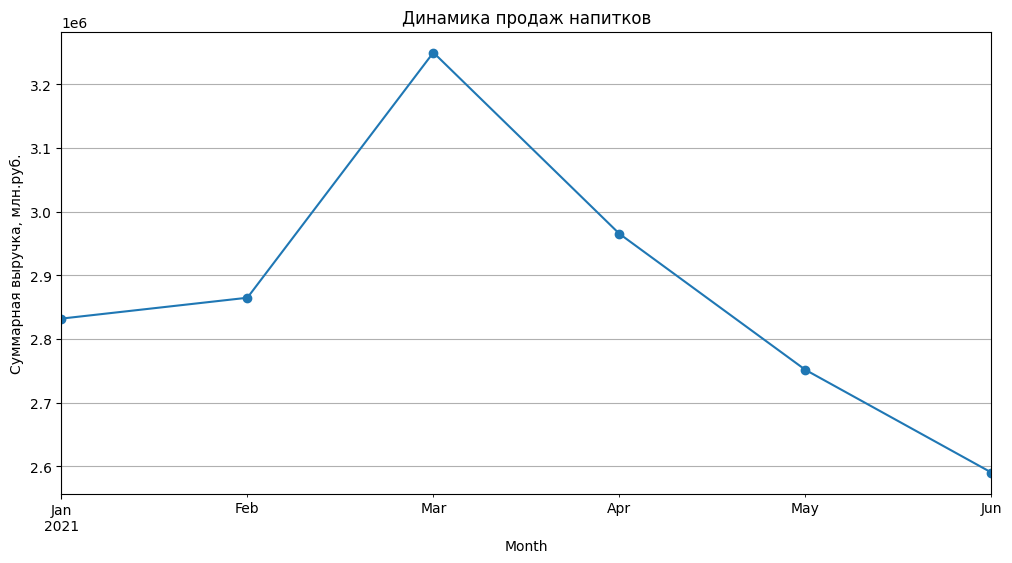

In [12]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Динамика продаж напитков')
plt.ylabel('Суммарная выручка, млн.руб.')
plt.grid(True)
plt.show()

In [13]:
# 2. Исследуйте и покажите на графике как отличаются продажи в будние и выходные
# в категориях 'Сокосодержащие напитки, смузи' и "Печенье"?

In [14]:
orders_categories['day_of_week'] = orders_categories['Date'].dt.dayofweek
orders_categories['IsWeekend'] = orders_categories['day_of_week'].isin([5,6])
juice_n_cookies = orders_categories[orders_categories['Category'].isin(['Сокосодержащие напитки, смузи', 'Печенье'])]
juice_n_cookies.head(3)

,OrderID,UserID,OrderTime,items,Date,ItemID,price,quantity,revenue,Category,ParentCategory,Month,day_of_week,IsWeekend
41,90622054,2.499293e+18,2021-01-01 04:13:13,"{'ItemID': '875721', 'price': 63.38, 'quantity...",2021-01-01,875721,63.38,1,63.38,Печенье,Мучные изделия,2021-01,4,False
156,90607873,7.328439e+18,2021-01-01 11:34:11,"{'ItemID': '513299', 'price': 77.9, 'quantity'...",2021-01-01,513299,77.90,1,77.90,Печенье,Мучные изделия,2021-01,4,False
161,90607873,7.328439e+18,2021-01-01 11:34:11,"{'ItemID': '308902', 'price': 73.9, 'quantity'...",2021-01-01,308902,73.90,1,73.90,Печенье,Мучные изделия,2021-01,4,False


In [15]:
sales_by_day = juice_n_cookies.groupby(['Category', 'IsWeekend'])['revenue'].sum().unstack()
sales_by_day

IsWeekend,False,True
Category,,
Печенье,1196907.00,408955.31
"Сокосодержащие напитки, смузи",106097.95,30036.75


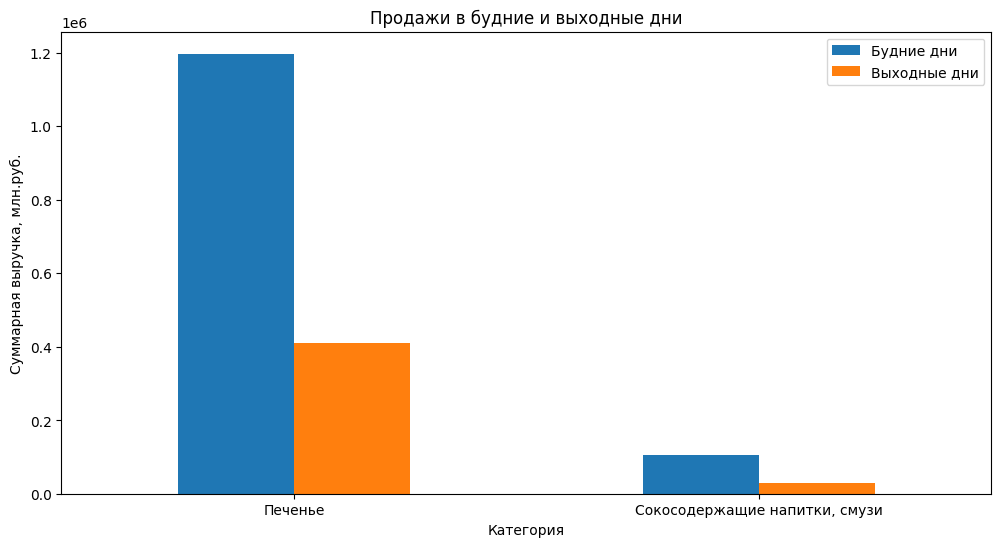

In [16]:
sales_by_day.plot(kind='bar', figsize=(12, 6))
plt.title('Продажи в будние и выходные дни')
plt.xlabel('Категория')
plt.ylabel('Суммарная выручка, млн.руб.')
plt.xticks(rotation=0)
plt.legend(['Будние дни', 'Выходные дни'])
plt.show()

In [17]:
# 3. Визуализируйте структуру продаж ParentCategory по показателю GMV за один месяц.
# Укажите категорию с наибольшей долей GMV.

In [18]:
for_may = orders_categories[(orders_categories['Date'] >= '2021-05-01') & (orders_categories['Date'] <= '2021-05-31')]
for_may.head(3)

,OrderID,UserID,OrderTime,items,Date,ItemID,price,quantity,revenue,Category,ParentCategory,Month,day_of_week,IsWeekend
618316,92954484,8.704034e+18,2021-05-01 00:03:47,"{'ItemID': '308134', 'price': 84.9, 'quantity'...",2021-05-01,308134,84.90,1,84.90,"Семечки, сухофрукты",Бакалея,2021-05,5,True
618317,92954484,8.704034e+18,2021-05-01 00:03:47,"{'ItemID': '419159', 'price': 84.9, 'quantity'...",2021-05-01,419159,84.90,1,84.90,Яйцо,"Мясо, птица, рыба",2021-05,5,True
618318,92954484,8.704034e+18,2021-05-01 00:03:47,"{'ItemID': '303946', 'price': 359.82, 'quantit...",2021-05-01,303946,359.82,1,359.82,Замороженная рыба,"Мясо, птица, рыба",2021-05,5,True


In [19]:
gmv_by_may = for_may.groupby('ParentCategory')['revenue'].sum().reset_index()
gmv_by_may

,ParentCategory,revenue
0,Бакалея,3609643.39
1,Бытовая химия,1063413.91
2,Для детей,484787.46
3,Для дома и сада,266722.67
4,Для праздника,55212.38
5,Для школы,3034.43
6,Зоотовары,654650.50
7,"Красота, гигиена, здоровье",1212813.56
8,Кухонные принадлежности,123882.83
9,Молочная продукция,4093044.89


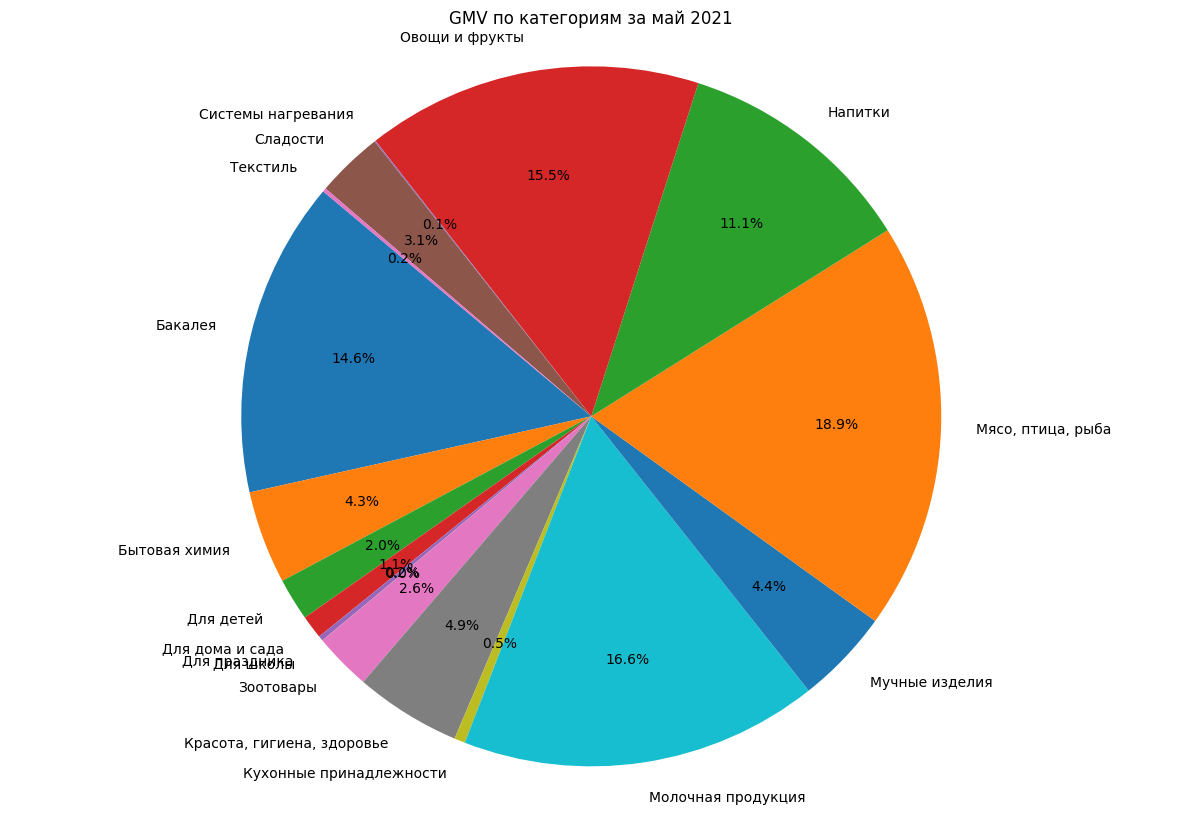

Категория с наибольшей долей GMV - Мясо, рыба, птица


In [20]:
plt.figure(figsize=(15, 10))
plt.pie(gmv_by_may['revenue'], labels=gmv_by_may['ParentCategory'], autopct='%1.1f%%', startangle=140, pctdistance=0.7)
plt.title('GMV по категориям за май 2021')
plt.axis('equal')
plt.show()
print('Категория с наибольшей долей GMV - Мясо, рыба, птица')

In [21]:
# 4. Исследуйте взаимосвясь между продажами категорий 'Чипсы, снеки, попкорн' и напитками:'Вода',
# 'Газированные напитки',  'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво'.
# С чем сильнее коррелируют 'Чипсы, снеки, попкорн'?

In [22]:
snacks = orders_categories[orders_categories['Category'] == 'Чипсы, снеки, попкорн']
drink = orders_categories[orders_categories['Category'].isin(['Вода',
        'Газированные напитки',  'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво'])]
drink.head(3)

,OrderID,UserID,OrderTime,items,Date,ItemID,price,quantity,revenue,Category,ParentCategory,Month,day_of_week,IsWeekend
17,90659865,1.609460e+18,2021-01-01 03:51:42,"{'ItemID': '313776', 'price': 99.9, 'quantity'...",2021-01-01,313776,99.90,1,99.90,"Соки, нектары",Напитки,2021-01,4,False
101,90582308,6.380061e+18,2021-01-01 09:55:35,"{'ItemID': '341996', 'price': 36.77, 'quantity...",2021-01-01,341996,36.77,6,220.62,Вода,Напитки,2021-01,4,False
115,90658044,8.026053e+18,2021-01-01 10:38:24,"{'ItemID': '616037', 'price': 310.0, 'quantity...",2021-01-01,616037,310.00,6,1860.00,"Соки, нектары",Напитки,2021-01,4,False


In [23]:
snacks_sales = snacks.groupby('Date')['revenue'].sum().reset_index().rename(columns={'revenue': 'Чипсы, снеки, попкорн'})
drink_sales = drink.groupby(['Date', 'Category'])['revenue'].sum().unstack().reset_index()
snacks_sales.head(3)

,Date,"Чипсы, снеки, попкорн"
0,2021-01-02,269.7
1,2021-01-03,304.8
2,2021-01-04,399.4


In [24]:
drink_n_snacks_sales = pd.merge(snacks_sales, drink_sales, on='Date')
drink_n_snacks_sales.head(3)

,Date,"Чипсы, снеки, попкорн",Безалкогольное пиво,Вино,Вода,Газированные напитки,Лимонады,Пиво,"Соки, нектары"
0,2021-01-02,269.7,NaN,NaN,28254.16,2262.32,227.7,NaN,9531.43
1,2021-01-03,304.8,676.50,NaN,24989.97,2864.98,773.7,NaN,12416.28
2,2021-01-04,399.4,535.54,NaN,26665.92,10512.60,1930.6,NaN,11720.67


In [25]:
corr_matrix = drink_n_snacks_sales.drop(columns=['Date']).corr()
corr_matrix

,"Чипсы, снеки, попкорн",Безалкогольное пиво,Вино,Вода,Газированные напитки,Лимонады,Пиво,"Соки, нектары"
"Чипсы, снеки, попкорн",1.000000,-0.071589,-0.819192,0.125265,0.024695,0.054912,NaN,0.002774
Безалкогольное пиво,-0.071589,1.000000,-1.000000,0.024835,0.044051,0.168800,NaN,0.203346
Вино,-0.819192,-1.000000,1.000000,-0.536363,-0.615418,-0.568996,NaN,-0.296343
Вода,0.125265,0.024835,-0.536363,1.000000,0.332999,0.242233,NaN,0.414037
Газированные напитки,0.024695,0.044051,-0.615418,0.332999,1.000000,0.219996,NaN,0.298053
Лимонады,0.054912,0.168800,-0.568996,0.242233,0.219996,1.000000,NaN,0.232514
Пиво,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Соки, нектары",0.002774,0.203346,-0.296343,0.414037,0.298053,0.232514,NaN,1.000000


In [26]:
snacks_corr = corr_matrix['Чипсы, снеки, попкорн'].drop('Чипсы, снеки, попкорн')
print(snacks_corr)

Безалкогольное пиво    -0.071589
Вино                   -0.819192
Вода                    0.125265
Газированные напитки    0.024695
Лимонады                0.054912
Пиво                         NaN
Соки, нектары           0.002774
Name: Чипсы, снеки, попкорн, dtype: float64


In [27]:
top_corr = snacks_corr.idxmax()
print(f'С чипсами, снеками и попкорном больше всего коррелирует {top_corr}')

С чипсами, снеками и попкорном больше всего коррелирует Вода


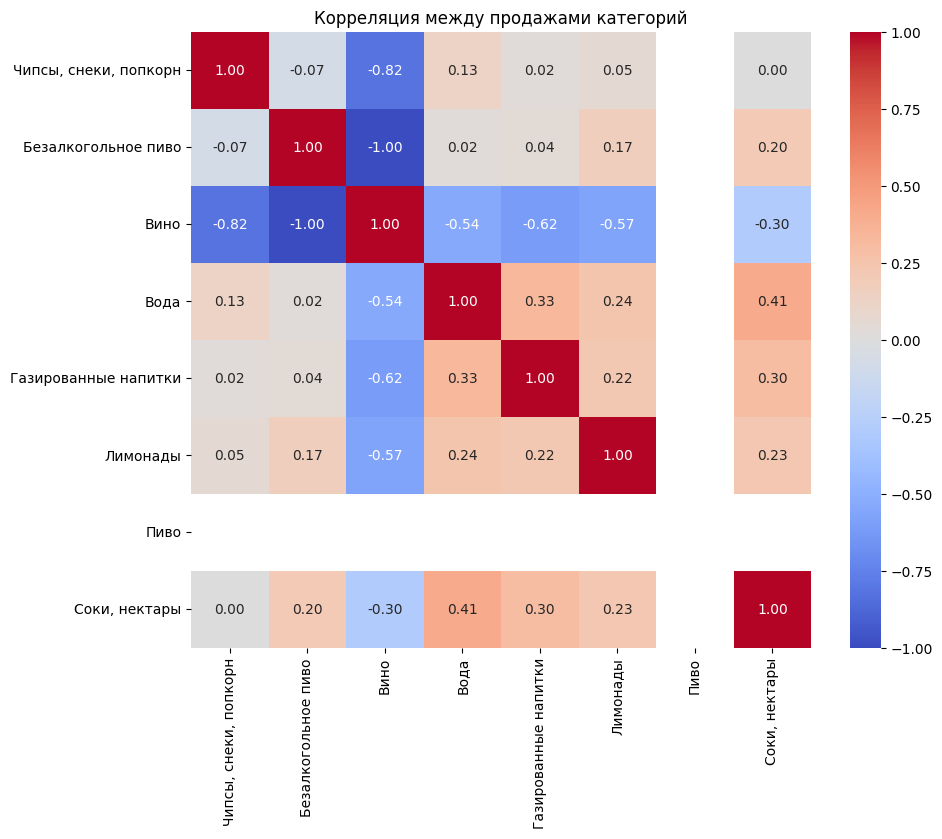

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между продажами категорий')
plt.show()
